# Customer Churn Prediction
---
# Overview & Background:

A business will measure [**customer churn**](https://en.wikipedia.org/wiki/Churn_rate) as the loss of existing customers continuing doing business or using their service with the company, compared to the total number of customers in a given period of time. Analyzing customer churn is important for a business to understand why a customer will stop using their service or want to stop doing business with them. Improving their customer retention is good for building brand loyalty and increasing overall customer satisfaction and profitability. While there are formulas that are easy to calculate what the customer churn is, it is difficult to accurately predict.                    

This dataset that I will be using comes from a telecommunication company and it provides the home phone and internet services to 7043 customers in California. 


The data set includes information about:
 * **Customers who left within the last month** – the column is called `Churn`
 * **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
 * **Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
 * **Demographic info about customers** – gender, age range, and if they have partners and dependents





In this project I will analyze the different factors that affect customer churn by creating regression models to identify correlation as well as creating a survival analysis model. I also create a prediction model using classification machine learning to accuractely predict the likeliness of a customer to churn.

Objectives:
 * What is the current churn percentage for this company?
 * What factors directly affect customer churn, and how does it differ? 
 * Does demographics or type of telecommunication service affect whether or not a customer will churn? 
 * Which services are the most profitable?
 * How long before a customer will change companies or churn?

The data comes from Kaggle and can be accessed [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

---
# Understanding the Data

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [31]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')



We will focus on the column ``Churn`` and all of the different columns/attributes that will correlate and affect customer churn.
There is data on 7043 customers and 21 columns/attributes on each customer.

---
# Data Cleaning

The first step is to check every column in the dataset for missing values. However, I noticed that the ``TotalCharges`` column is listed as an "object" instead of a "float64". We will change only the ``TotalCharges`` column into a number value and then track the number of missing values.

In [34]:
# Turn total charges into a number value and check for missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

I decided to replace the missing data as the media of the column to account for any outliers within the data. 

In [35]:
# Replace NaN with the column mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
df = df.drop('customerID', axis = 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [37]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The data now seems to be accounted for when it comes to missing data and so now we can move onto the visualizations.

---
# Data Visualizations

In this section I am going to create frequency tables that will compare the attribute of the customer to the churn. This is to look closely at the exact numbers between what is most common for customers to churn.

In [39]:
# Frequency of Churn/No Churn
churn_stats = df['Churn'].value_counts(normalize=True) * 100
churn_stats

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

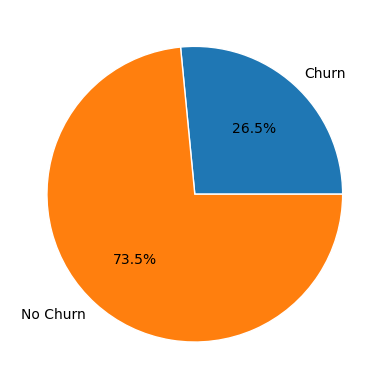

In [40]:
# Data visualization to churn/no churn

labels = 'Churn', 'No Churn'
sizes = [26.536987, 73.463013]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,
      wedgeprops=dict(edgecolor='white'), autopct='%1.1f%%')
plt.show()

There is overall a lot of "No Churn" from the customers, however there was about a quarter of the customers who did churn. We will look closer at why these customers might have churned and the factors that correlate with churning.

In [41]:
# Calculate the average of monthly charges for no churn
no_churn = df[df['Churn'] == 'No']
average_monthly_no_churn = no_churn['MonthlyCharges'].mean()
print(f"Average Monthly Charges for No Churn: {average_monthly_no_churn}")

# Calculate the median of monthly charges for no churn
median_monthly_no_churn = no_churn['MonthlyCharges'].median()
print(f"Median Monthly Charges for No Churn: {median_monthly_no_churn}")

# Calculate the average of monthly charges for churn
yes_churn = df[df['Churn'] == 'Yes']
average_monthly_yes_churn = yes_churn['MonthlyCharges'].mean()
print(f"Average Monthly Charges for Churn: {average_monthly_yes_churn}")

# Calculate the average of monthly charges for churn
median_monthly_yes_churn = yes_churn['MonthlyCharges'].median()
print(f"Median Monthly Charges for Churn: {median_monthly_yes_churn}")

Average Monthly Charges for No Churn: 61.26512369540008
Median Monthly Charges for No Churn: 64.42500000000001
Average Monthly Charges for Churn: 74.44133226324237
Median Monthly Charges for Churn: 79.65


The customers who churned generally have **higher monthly bills**. This could indicate that higher pricing is linked to dissatisfaction, especially if they feel it doesn't match the value they get. Median being higher than average (especially for churners) hints at some lower outliers — but many churners are paying high monthly fees.

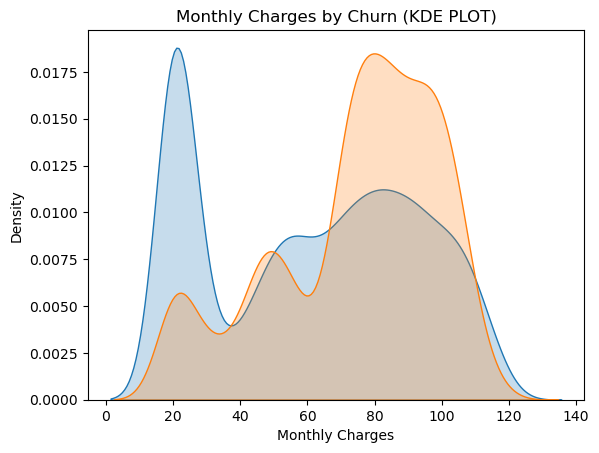

In [42]:
# Data visualization of churn/no churn based on monthly charges

# Filter and plot the data for 'Churn' == 0 and 'Churn' == 1
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'No'], fill = True, label="No Churn")
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'Yes'], fill = True, label="Churn")

# Add labels and title
plt.title('Monthly Charges by Churn (KDE PLOT)')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')

# Display the legend and the plot
plt.show()

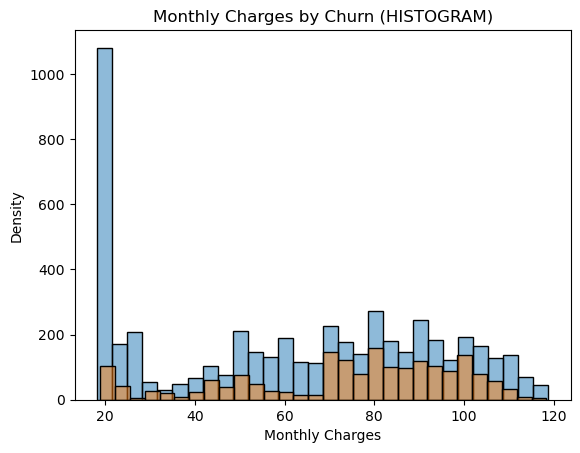

In [43]:
# Data visualization of churn/no churn based on monthly charges (histogram)

# Filter and plot the data for 'Churn' == 0 and 'Churn' == 1
sns.histplot(df.MonthlyCharges[df["Churn"] == 'No'], bins = 30, alpha = 0.5, label="No Churn")
sns.histplot(df.MonthlyCharges[df["Churn"] == 'Yes'], bins = 30, alpha = 0.5, label="Churn")

# Add labels and title
plt.title('Monthly Charges by Churn (HISTOGRAM)')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')

# Display the legend and the plot
plt.show()

In [44]:
# Calculate the average of total charges for no churn
average_total_no_churn = no_churn['TotalCharges'].mean()
print(f"Average Total Charges for No Churn : {average_total_no_churn}")

# Calculate the average of total charges for churn
average_total_yes_churn = yes_churn['TotalCharges'].mean()
print(f"Average Total Charges for Churn: {average_total_yes_churn}")

# Calculate the median of total charges for no churn
median_total_no_churn = no_churn['TotalCharges'].median()
print(f"Median Total Charges for No Churn: {median_total_no_churn}")

# Calculate the median of total charges for churn
median_total_yes_churn = yes_churn['TotalCharges'].median()
print(f"Median Total Charges for Churn: {median_total_yes_churn}")

Average Total Charges for No Churn : 2552.882494201778
Average Total Charges for Churn: 1531.7960941680042
Median Total Charges for No Churn: 1679.525
Median Total Charges for Churn: 703.55


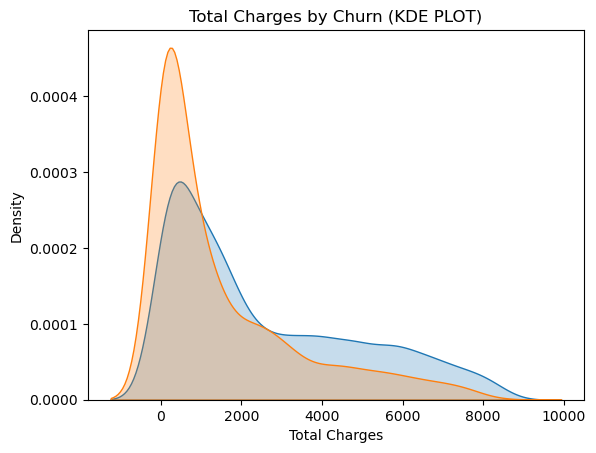

In [45]:
# Data visualization of churn/no churn based on total charges (kde plot)

# Filter and plot the data for 'Churn' == 0 and 'Churn' == 1
sns.kdeplot(df.TotalCharges[df["Churn"] == 'No'], fill = True, label="No Churn")
sns.kdeplot(df.TotalCharges[df["Churn"] == 'Yes'], fill = True, label="Churn")

# Add labels and title
plt.title('Total Charges by Churn (KDE PLOT)')
plt.xlabel('Total Charges')
plt.ylabel('Density')

# Display the legend and the plot
plt.show()

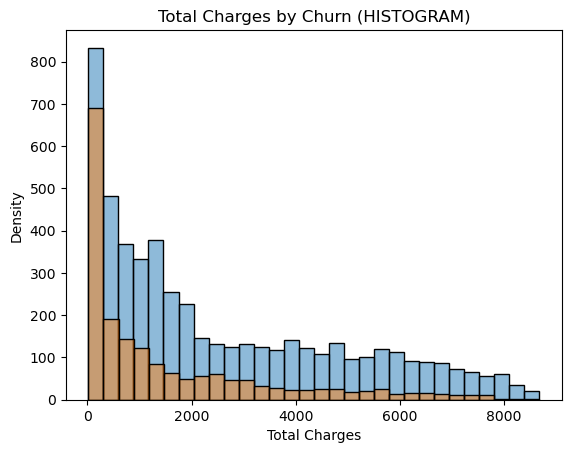

In [46]:
# Data visualization of churn/no churn based on total charges

# Filter and plot the data for 'Churn' == 0 and 'Churn' == 1
sns.histplot(df.TotalCharges[df["Churn"] == 'No'], bins = 30, alpha = 0.5, label="No Churn")
sns.histplot(df.TotalCharges[df["Churn"] == 'Yes'], bins = 30, alpha = 0.5, label="Churn")

# Add labels and title
plt.title('Total Charges by Churn (HISTOGRAM)')
plt.xlabel('Total Charges')
plt.ylabel('Density')

# Display the legend and the plot
plt.show()

In [47]:
# Calculate the average tenure for no churn
average_tenure_no_churn = no_churn['tenure'].mean()
print(f"Average Tenure for No Churn : {average_tenure_no_churn}")

# Calculate the median tenure for no churn
median_tenure_no_churn = no_churn['tenure'].median()
print(f"Median Tenure for No Churn: {median_tenure_no_churn}")

# Calculate the average tenure for churn
average_tenure_yes_churn = yes_churn['tenure'].mean()
print(f"Average Tenure for Churn: {average_tenure_yes_churn}")

# Calculate the median tenure for churn
median_tenure_yes_churn = yes_churn['tenure'].median()
print(f"Median Tenure for Churn: {median_tenure_yes_churn}")

Average Tenure for No Churn : 37.56996521066873
Median Tenure for No Churn: 38.0
Average Tenure for Churn: 17.979133226324237
Median Tenure for Churn: 10.0


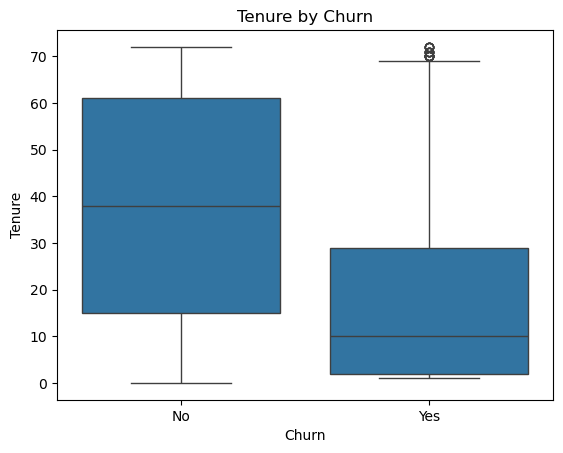

In [48]:
# Data visualization for tenure by churn
sns.boxplot(data = df, x = 'Churn', y = 'tenure')

# Add labels and title
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

# Display the legend and the plot
plt.show()

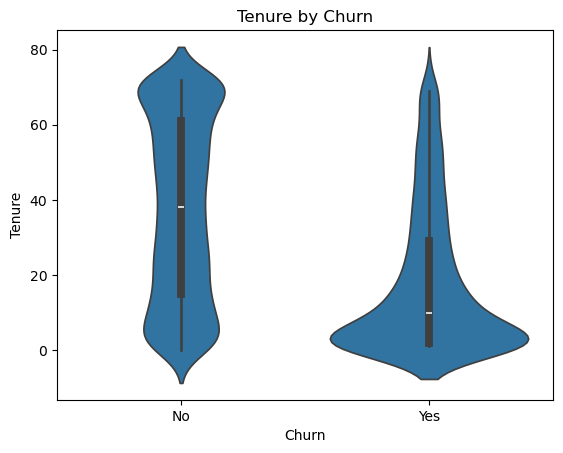

In [49]:
# Data visualization for tenure by churn
sns.violinplot(data = df, x = 'Churn', y = 'tenure')

# Add labels and title
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

# Display the legend and the plot
plt.show()

In [50]:
# Percentage of Churn vs. No Churn

# Count occurrences of churn and non-churn
churn_counts = df['Churn'].value_counts()

# Calculate percentage
churn_percentage = (churn_counts / len(df)) * 100
churn_percentage

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Contract  Month-to-month  One year  Two year
Churn                                       
No                  2220      1307      1647
Yes                 1655       166        48


Contract  Month-to-month   One year   Two year
Churn                                         
No             42.906842  25.260920  31.832238
Yes            88.550027   8.881755   2.568218


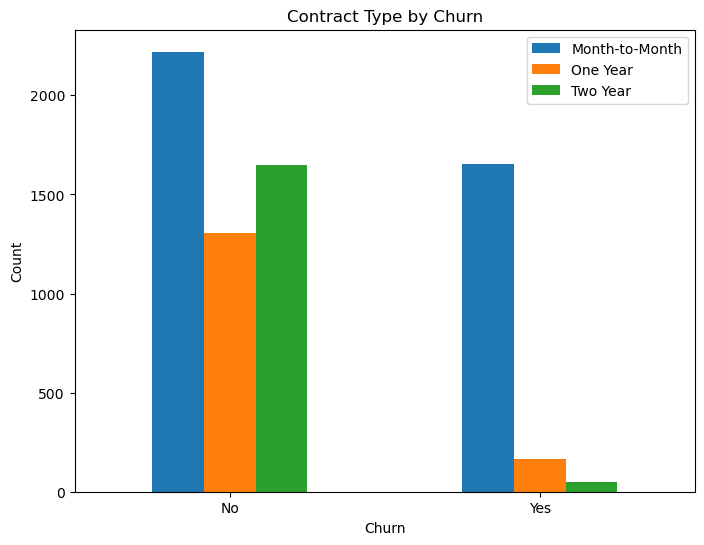

In [51]:
# Data visualization for Contract Type by Churn

#Frequency Table for contract type
contracttype_churn_counts = df.groupby(['Churn', 'Contract']).size().unstack(fill_value=0)
print(contracttype_churn_counts)
print("\n")
# Normalized frequency table for the contract type
contract_table_percent = contracttype_churn_counts.div(contracttype_churn_counts.sum(axis=1), axis=0) * 100
print(contract_table_percent)

# Create bar chart

# Plot the bar chart
contracttype_churn_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Contract Type by Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Month-to-Month', 'One Year', 'Two Year'], loc='upper right')

# Show the chart
plt.show()


In [52]:
# Frequency for each type of payment method
payment_stats = df['PaymentMethod'].value_counts(normalize=True) * 100
payment_stats


PaymentMethod
Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: proportion, dtype: float64

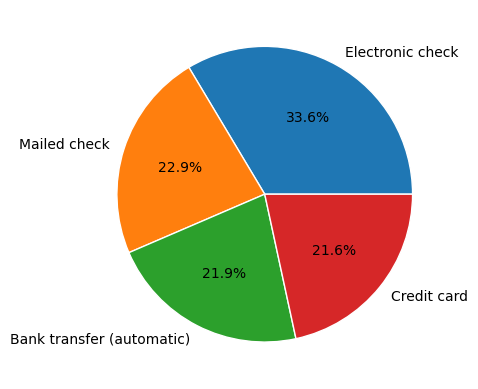

In [53]:
# Data visualization to show disitrbution of all four payment methods


labels = 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card'
sizes = [33.579441, 22.887974, 21.922476, 21.610109]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,
      wedgeprops=dict(edgecolor='white'), autopct='%1.1f%%')
plt.show()

In [54]:
payment_dist = df.groupby('Churn')['PaymentMethod'].value_counts().unstack()
print(payment_dist)
print('\n')

# Percentage for Payment Method in Customer Churn overall
payment_churn_percentage = df.groupby('Churn')['PaymentMethod'].value_counts(normalize=True).mul(100).unstack()
print(payment_churn_percentage)

PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                                  1286                     1290   
Yes                                  258                      232   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                         1294          1304  
Yes                        1071           308  


PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                             24.855044                24.932354   
Yes                            13.804173                12.413055   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                    25.009664     25.202938  
Yes                   57.303371     16.479401  


PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                                  1286                     1290   
Yes                                  258                      232   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                         1294          1304  
Yes                        1071           308  


PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                             24.855044                24.932354   
Yes                            13.804173                12.413055   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                    25.009664     25.202938  
Yes                   57.303371     16.479401  


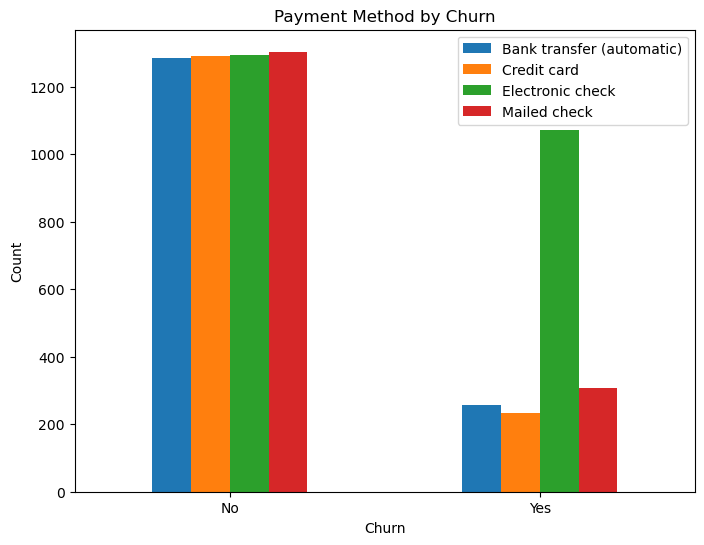

In [55]:
# Data visualization for payment method by Churn

#Frequency Table for contract type
payment_churn_counts = df.groupby(['Churn', 'PaymentMethod']).size().unstack(fill_value=0)
print(payment_churn_counts)
print("\n")

# Normalized frequency table for the contract type
payment_table_percent = payment_churn_counts.div(payment_churn_counts.sum(axis=1), axis=0) * 100
print(payment_table_percent)

# Create bar chart

# Plot the bar chart
payment_churn_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Payment Method by Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Bank transfer (automatic)', 'Credit card', 'Electronic check', 'Mailed check'], loc='upper right')

# Show the chart
plt.show()



In [56]:
df = df.rename(columns={
    'PhoneService': 'Phone Service',
    'MultipleLines': 'Multiple Lines',
    'InternetService': 'Internet Service',
    'OnlineSecurity': 'Online Security',
    'OnlineBackup': 'Online Backup',
    'DeviceProtection': 'Device Protection',
    'TechSupport': 'Tech Support',
    'StreamingTV': 'Streaming TV',
    'StreamingMovies': 'Streaming Movies',
})

service = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 
            'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
def generate_service_frequency_by_churn(df, service):
    for col in service:
        print(f"\nFrequency Table for '{col}' (Grouped by Churn):")
        print(df.groupby('Churn')[col].value_counts())  # Raw counts
        print("\nPercentage Distribution by Churn:")
        print(df.groupby('Churn')[col].value_counts(normalize=True).mul(100).round(2))  # Percentage
        print("-" * 60)

# Call function on the service columns
generate_service_frequency_by_churn(df, service)


Frequency Table for 'Phone Service' (Grouped by Churn):
Churn  Phone Service
No     Yes              4662
       No                512
Yes    Yes              1699
       No                170
Name: count, dtype: int64

Percentage Distribution by Churn:
Churn  Phone Service
No     Yes              90.1
       No                9.9
Yes    Yes              90.9
       No                9.1
Name: proportion, dtype: float64
------------------------------------------------------------

Frequency Table for 'Multiple Lines' (Grouped by Churn):
Churn  Multiple Lines  
No     No                  2541
       Yes                 2121
       No phone service     512
Yes    Yes                  850
       No                   849
       No phone service     170
Name: count, dtype: int64

Percentage Distribution by Churn:
Churn  Multiple Lines  
No     No                  49.11
       Yes                 40.99
       No phone service     9.90
Yes    Yes                 45.48
       No              

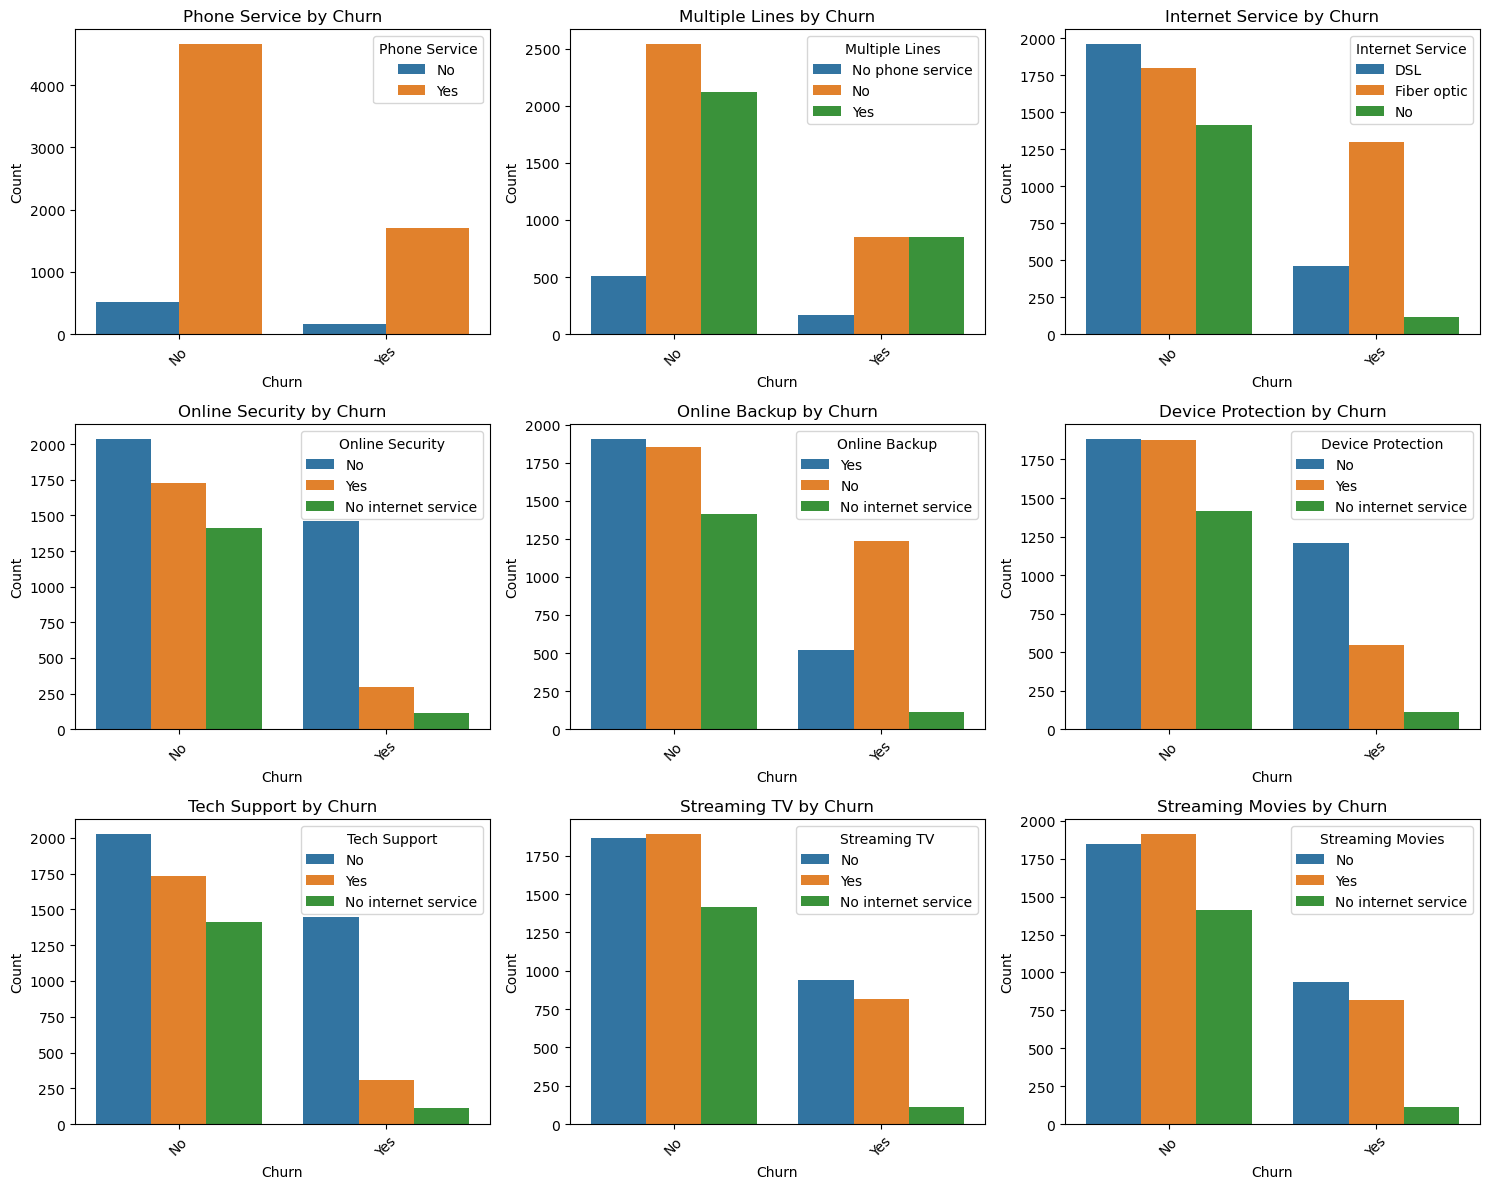

In [57]:
# Data visualization for different telecommunication services by Churn

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid
axes = axes.flatten()  # Flatten to loop easily

# Generate bar charts for each service column
for i, col in enumerate(service):
    sns.countplot(data=df, x='Churn', hue=col, ax=axes[i])
    axes[i].set_title(f"{col} by Churn")
    axes[i].set_xlabel("Churn")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [58]:
# Create frequency table for each demographic

# Rename columns
df = df.rename(columns = {
    'gender' : 'Gender',
    'SeniorCitizen' : 'Senior Citizen'
})

# Rename values in the 'Senior Citizen' column
df['Senior Citizen'] = df['Senior Citizen'].replace({0: 'No', 1: 'Yes'})
               
# Data visualization for demographics
demographics = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

# Frequency table function
def generate_demographic_frequency_by_churn(df, demographics):
    for col in demographics:
        print(f"\nFrequency Table for '{col}' (Grouped by Churn):")
        print(df.groupby('Churn')[col].value_counts())  # Raw counts
        print("\nPercentage Distribution by Churn:")
        print(df.groupby('Churn')[col].value_counts(normalize=True).mul(100).round(2))  # Percentage
        print("-" * 60)

# Call function on the demographics columns
generate_service_frequency_by_churn(df, demographics)


Frequency Table for 'Gender' (Grouped by Churn):
Churn  Gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: count, dtype: int64

Percentage Distribution by Churn:
Churn  Gender
No     Male      50.73
       Female    49.27
Yes    Female    50.24
       Male      49.76
Name: proportion, dtype: float64
------------------------------------------------------------

Frequency Table for 'Senior Citizen' (Grouped by Churn):
Churn  Senior Citizen
No     No                4508
       Yes                666
Yes    No                1393
       Yes                476
Name: count, dtype: int64

Percentage Distribution by Churn:
Churn  Senior Citizen
No     No                87.13
       Yes               12.87
Yes    No                74.53
       Yes               25.47
Name: proportion, dtype: float64
------------------------------------------------------------

Frequency Table for 'Partner' (Grouped by Churn):
Churn  Partner
No     Yes        27

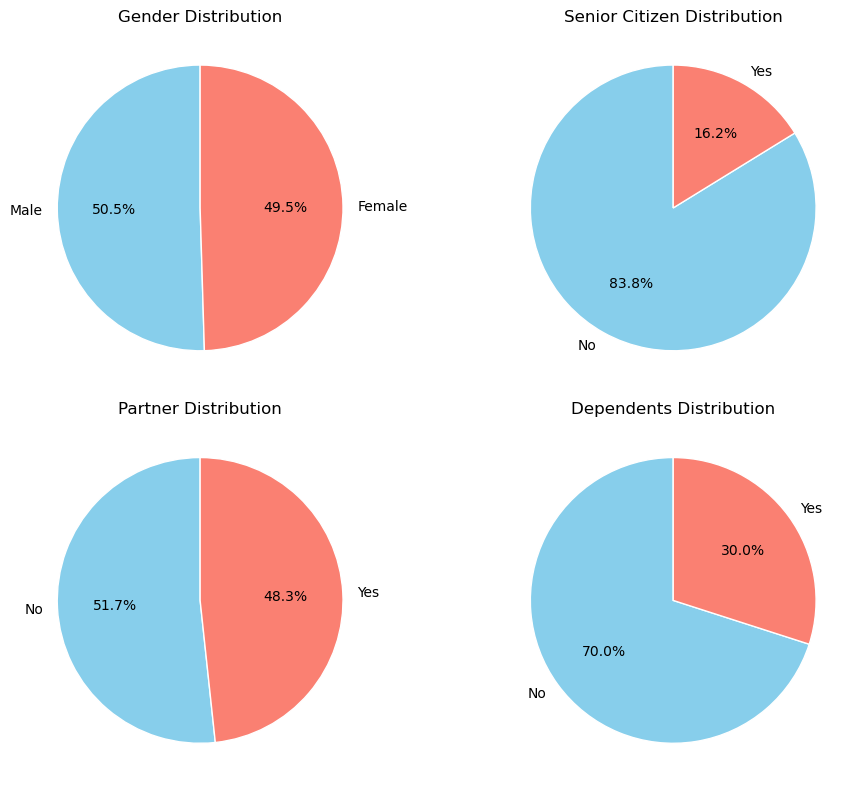

In [59]:
# Set up the figure (for a 2x2 grid layout)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid for 4 demographic features
axes = axes.flatten()

# Loop through demographic columns to create pie charts
for i, col in enumerate(demographics):
    ax = axes[i]
    
    # Get the value counts for the demographic column
    demographic_counts = df[col].value_counts()

    # Create pie chart for the demographic distribution
    ax.pie(
        demographic_counts, labels=demographic_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['skyblue', 'salmon'], wedgeprops={'edgecolor': 'white'}
    )
    ax.set_title(f'{col} Distribution')

# Adjust layout and display the pie charts
plt.tight_layout()
plt.show()

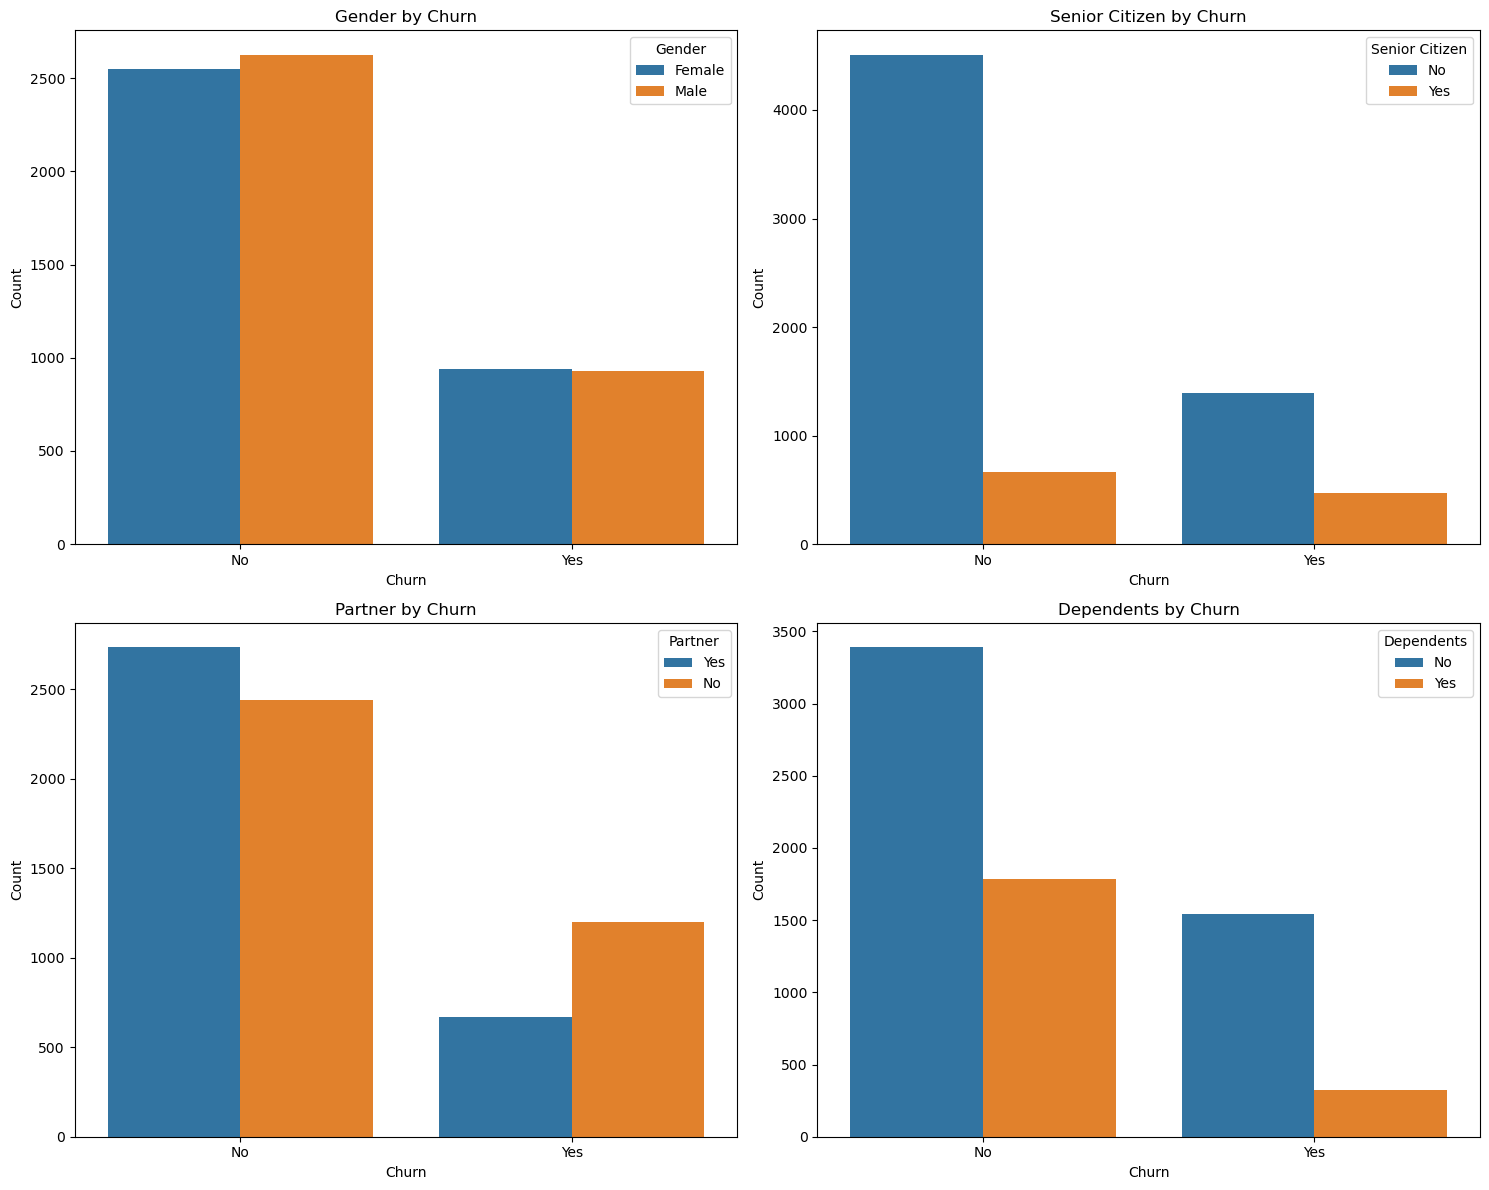

In [60]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))  # 2x2 grid
axes = axes.flatten()  # Flatten to loop easily

# Generate bar charts for each service column
for i, col in enumerate(demographics):
    sns.countplot(data=df, x='Churn', hue=col, ax=axes[i])
    axes[i].set_title(f"{col} by Churn")
    axes[i].set_xlabel("Churn")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=0)  # Rotate x-axis labels for readability

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


PaperlessBilling    No   Yes
Churn                       
No                2403  2771
Yes                469  1400


PaperlessBilling         No        Yes
Churn                                 
No                46.443757  53.556243
Yes               25.093633  74.906367


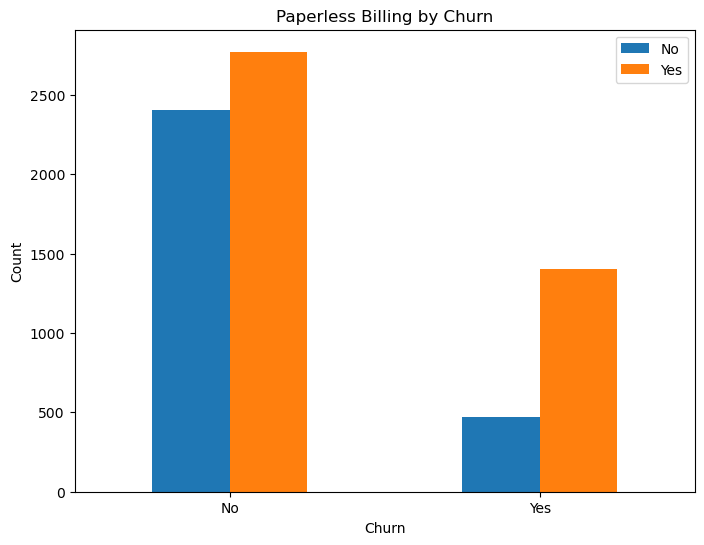

In [61]:
# Data visualization for paperless billing by Churn

#Frequency Table for contract type
billing_churn_counts = df.groupby(['Churn', 'PaperlessBilling']).size().unstack(fill_value=0)
print(billing_churn_counts)
print("\n")

# Normalized frequency table for the contract type
billing_table_percent = billing_churn_counts.div(billing_churn_counts.sum(axis=1), axis=0) * 100
print(billing_table_percent)

# Create bar chart

# Plot the bar chart
billing_churn_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Paperless Billing by Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No', 'Yes'], loc='upper right')

# Show the chart
plt.show()

# Survival Analysis Model

**Survival Function**

Using the cdf, we can calculate the survival function, or the probability that the event has not occurred by the time $t$. This means that, S(t) gives us the proportion of population with the time to event value more than t. The survival function looks like:

$$S(t)=1-F(t)=P(T\geq t)$$

We can also express this as an integral:

$$\int_{t}^{\infty}f(x)dx$$


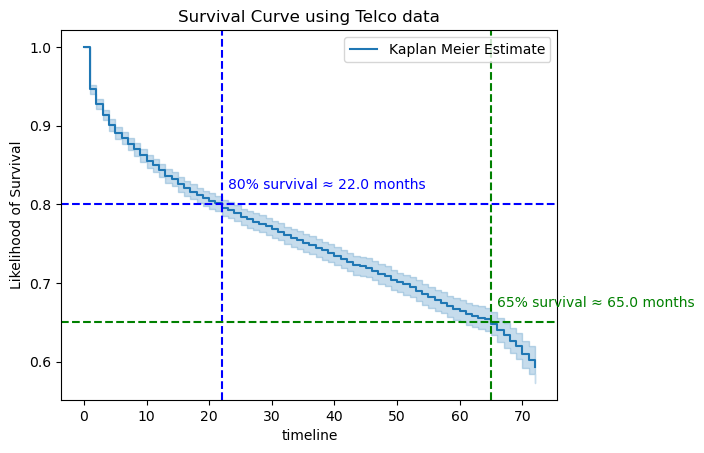

In [62]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
durations = df['tenure'] 
event_observed = df['Churn'] 

km = KaplanMeierFitter() 

km.fit(durations, event_observed, label='Kaplan Meier Estimate')

km.plot()
# Helper function to find the time when survival function drops below a given probability
def time_at_survival_threshold(kmf, threshold):
    sf = kmf.survival_function_
    return sf[sf[kmf._label] <= threshold].index.min()

# Thresholds
thresholds = [0.8, 0.65]
colors = ['blue', 'green']

for thresh, color in zip(thresholds, colors):
    time = time_at_survival_threshold(km, thresh)
    if pd.notna(time):
        # Horizontal and vertical lines
        plt.axhline(thresh, color=color, linestyle='dashed')
        plt.axvline(time, color=color, linestyle='dashed')
        
        # Annotate the point
        plt.text(time + 1, thresh + 0.02,
                 f"{int(thresh*100)}% survival ≈ {time} months",
                 color=color, fontsize=10)
plt.title('Survival Curve using Telco data')
plt.ylabel('Likelihood of Survival');

Analysis of this graph:

There is _80% probability of survival_ beyond about 22 months and _65% probability_ of survival beyond about 65 months. 

This graph represents the likeliness of survival (not churning), how long a customer will stay before changing companies or churning.

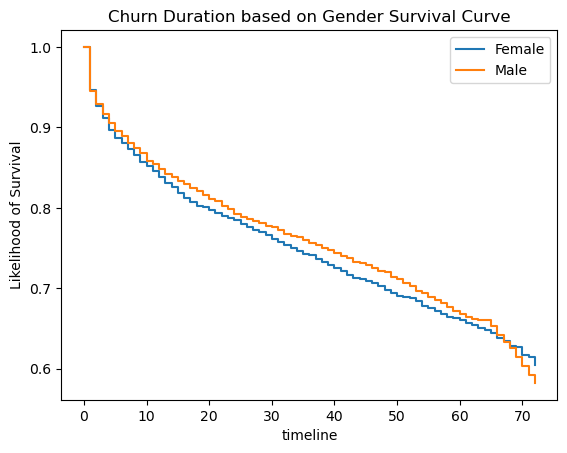

In [63]:
# Group 1: Female
kmf_ch1 = KaplanMeierFitter() 
T1 = df.loc[df['Gender'] == 'Female', 'tenure']
E1 = df.loc[df['Gender'] == 'Female', 'Churn']
kmf_ch1.fit(T1, E1, label='Female')   
ax = kmf_ch1.plot(ci_show=False)

# Group 2: Male
kmf_ch2 = KaplanMeierFitter() 
T2 = df.loc[df['Gender'] == 'Male', 'tenure']
E2 = df.loc[df['Gender'] == 'Male', 'Churn']
kmf_ch2.fit(T2, E2, label='Male')   
ax = kmf_ch2.plot(ci_show=False)

plt.title("Churn Duration based on Gender Survival Curve")
plt.ylabel('Likelihood of Survival');

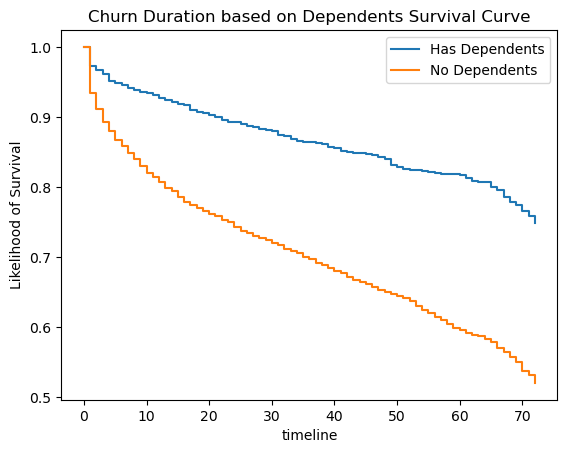

In [64]:
# Group 1: Has Dependents
kmf_ch1 = KaplanMeierFitter() 
T1 = df.loc[df['Dependents'] == 'Yes', 'tenure']
E1 = df.loc[df['Dependents'] == 'Yes', 'Churn']
kmf_ch1.fit(T1, E1, label='Has Dependents')   
ax = kmf_ch1.plot(ci_show=False)

# Group 2: Doesn't have Dependents
kmf_ch2 = KaplanMeierFitter() 
T2 = df.loc[df['Dependents'] == 'No', 'tenure']
E2 = df.loc[df['Dependents'] == 'No', 'Churn']
kmf_ch2.fit(T2, E2, label='No Dependents')   
ax = kmf_ch2.plot(ci_show=False)

plt.title("Churn Duration based on Dependents Survival Curve")
plt.ylabel('Likelihood of Survival');

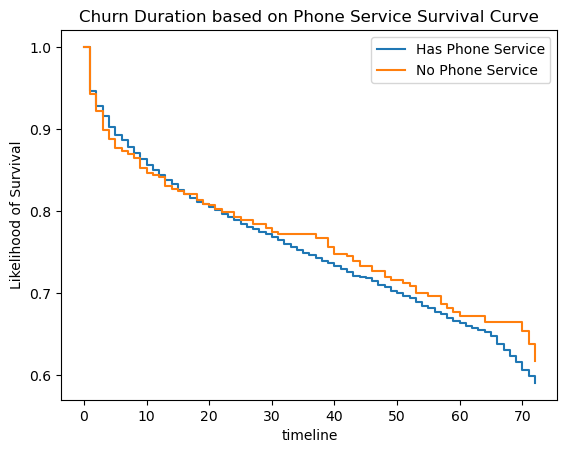

In [76]:
# Group 1: Has Phone Service
kmf_ch1 = KaplanMeierFitter() 
T1 = df.loc[df['Phone Service'] == 'Yes', 'tenure']
E1 = df.loc[df['Phone Service'] == 'Yes', 'Churn']
kmf_ch1.fit(T1, E1, label='Has Phone Service')   
ax = kmf_ch1.plot(ci_show=False)

# Group 2: Doesn't have Phone Service
kmf_ch2 = KaplanMeierFitter() 
T2 = df.loc[df['Phone Service'] == 'No', 'tenure']
E2 = df.loc[df['Phone Service'] == 'No', 'Churn']
kmf_ch2.fit(T2, E2, label='No Phone Service')   
ax = kmf_ch2.plot(ci_show=False)

plt.title("Churn Duration based on Phone Service Survival Curve")
plt.ylabel('Likelihood of Survival');

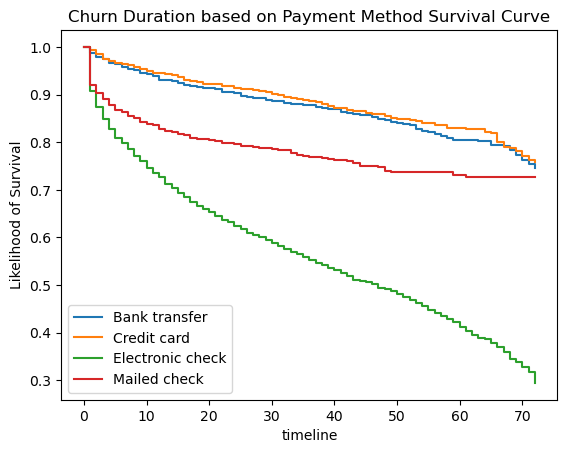

In [65]:
# Group 1: Bank transfer (automatic)
kmf_ch1 = KaplanMeierFitter() 
T1 = df.loc[df['PaymentMethod'] == 'Bank transfer (automatic)', 'tenure']
E1 = df.loc[df['PaymentMethod'] == 'Bank transfer (automatic)', 'Churn']
kmf_ch1.fit(T1, E1, label='Bank transfer')   
ax = kmf_ch1.plot(ci_show=False)

# Group 2: Credit Card
kmf_ch2 = KaplanMeierFitter() 
T2 = df.loc[df['PaymentMethod'] == 'Credit card (automatic)', 'tenure']
E2 = df.loc[df['PaymentMethod'] == 'Credit card (automatic)', 'Churn']
kmf_ch2.fit(T2, E2, label='Credit card')   
ax = kmf_ch2.plot(ci_show=False)

# Group 3: Electronic Check
kmf_ch3 = KaplanMeierFitter() 
T3 = df.loc[df['PaymentMethod'] == 'Electronic check', 'tenure']
E3 = df.loc[df['PaymentMethod'] == 'Electronic check', 'Churn']
kmf_ch3.fit(T3, E3, label='Electronic check')   
ax = kmf_ch3.plot(ci_show=False)

# Group 4: Mailed Check
kmf_ch4 = KaplanMeierFitter() 
T4 = df.loc[df['PaymentMethod'] == 'Mailed check', 'tenure']
E4 = df.loc[df['PaymentMethod'] == 'Mailed check', 'Churn']
kmf_ch4.fit(T4, E4, label='Mailed check')   
ax = kmf_ch4.plot(ci_show=False)

plt.title("Churn Duration based on Payment Method Survival Curve")
plt.ylabel('Likelihood of Survival');

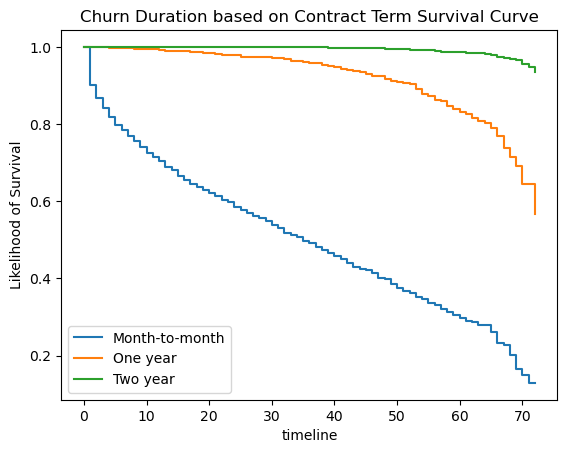

In [66]:
# Group 1: Month-to-month
kmf_ch1 = KaplanMeierFitter() 
T1 = df.loc[df['Contract'] == 'Month-to-month', 'tenure']
E1 = df.loc[df['Contract'] == 'Month-to-month', 'Churn']
kmf_ch1.fit(T1, E1, label='Month-to-month')   
ax = kmf_ch1.plot(ci_show=False)

# Group 2: One year
kmf_ch2 = KaplanMeierFitter() 
T2 = df.loc[df['Contract'] == 'One year', 'tenure']
E2 = df.loc[df['Contract'] == 'One year', 'Churn']
kmf_ch2.fit(T2, E2, label='One year')   
ax = kmf_ch2.plot(ci_show=False)

# Group 3: Two year
kmf_ch3 = KaplanMeierFitter() 
T3 = df.loc[df['Contract'] == 'Two year', 'tenure']
E3 = df.loc[df['Contract'] == 'Two year', 'Churn']
kmf_ch3.fit(T3, E3, label='Two year')   
ax = kmf_ch3.plot(ci_show=False)

plt.title("Churn Duration based on Contract Term Survival Curve")
plt.ylabel('Likelihood of Survival');

# Data Processing

In [67]:
# Turn categorical variables into numbers
df_copy = df.copy()
columns = df_copy.columns
label_encoder = LabelEncoder()
for col in columns:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])
df_copy

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3625,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3571,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,3701,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,6305,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,1265,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,1157,1


In [68]:
# Find the correlation between Churn and other variables
correlation_matrix = df_copy.corr()
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_correlation)

Churn                1.000000
PaperlessBilling     0.191825
MonthlyCharges       0.183523
Senior Citizen       0.150889
PaymentMethod        0.107062
Multiple Lines       0.038037
Phone Service        0.011942
Gender              -0.008612
Streaming TV        -0.036581
Streaming Movies    -0.038492
Internet Service    -0.047291
Partner             -0.150448
Dependents          -0.164221
Device Protection   -0.178134
Online Backup       -0.195525
TotalCharges        -0.230754
Tech Support        -0.282492
Online Security     -0.289309
tenure              -0.352229
Contract            -0.396713
Name: Churn, dtype: float64


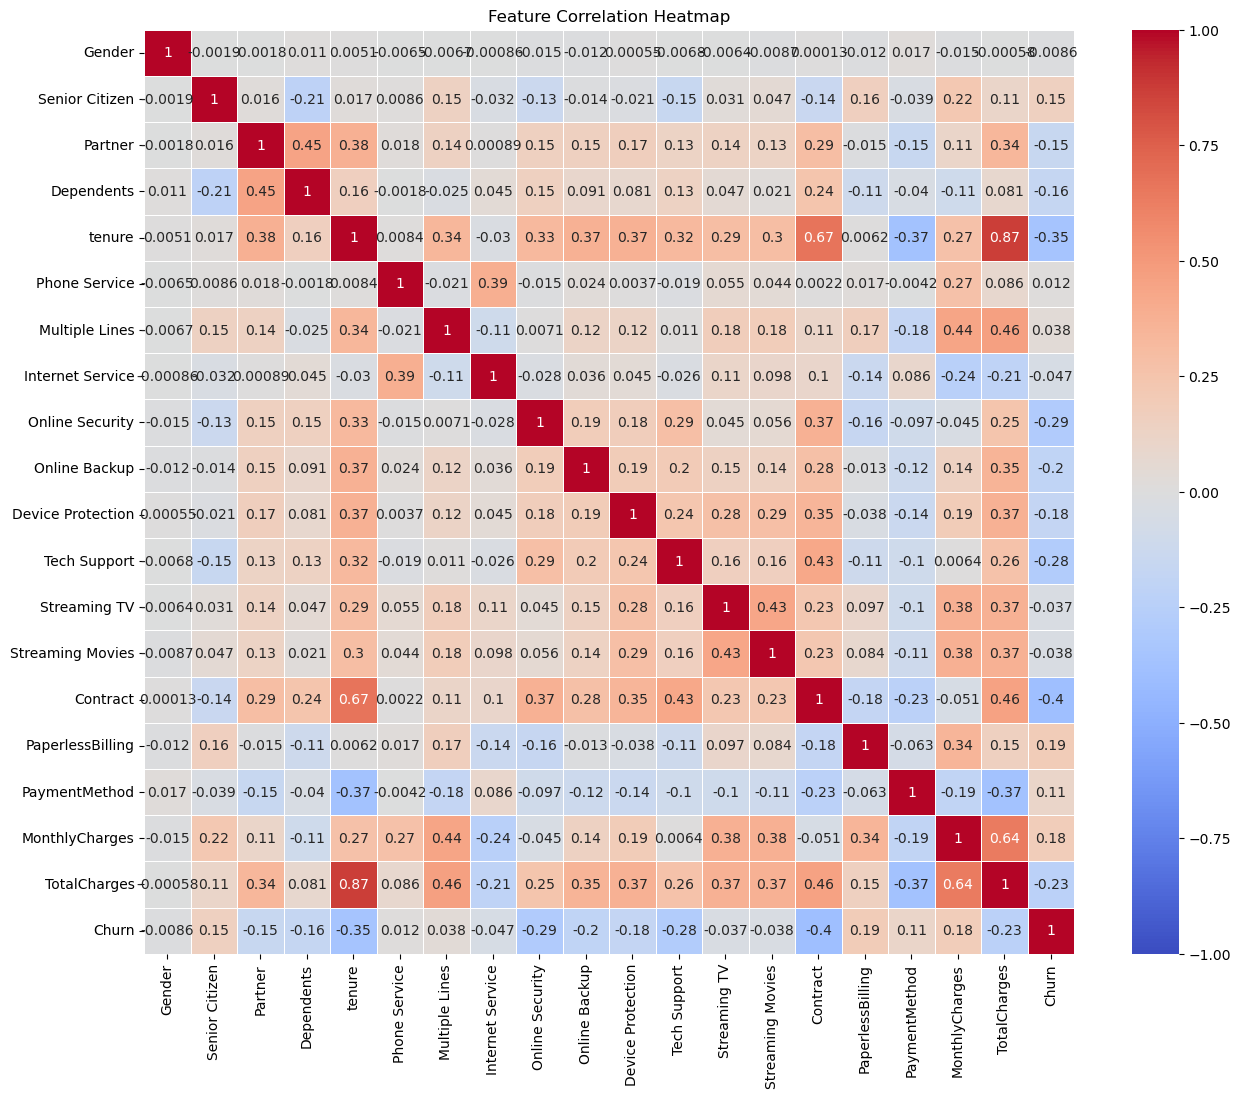

In [69]:
# Visualize with a heat map
plt.figure(figsize=(15, 12))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin = -1, vmax = 1)
plt.title('Feature Correlation Heatmap')
plt.show()

In [70]:
# Define features and target
X = df_copy.drop(columns=['Churn']) 
y = df_copy['Churn']
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Machine Learning Models and Predictions

In [71]:
# Train with Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_RF = random_forest.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_RF)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 79.63094393186657%


In [77]:
# Confusion matrix for Random Forest

confusion_matrix_RF = metrics.confusion_matrix(y_test, y_pred_RF)
confusion_matrix_RF

array([[946,  90],
       [197, 176]])

Text(0.5, 427.9555555555555, 'Predicted label')

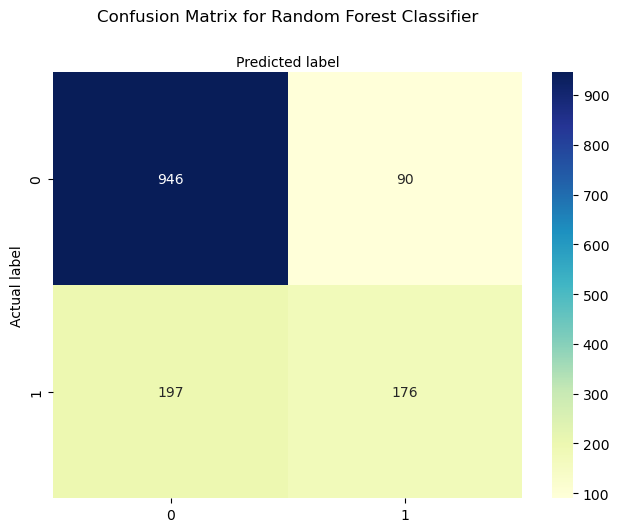

In [78]:
# Create confusion matrix heat map for Logistic Regression
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Random Forest Classifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [79]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred_RF, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1036
       Churn       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



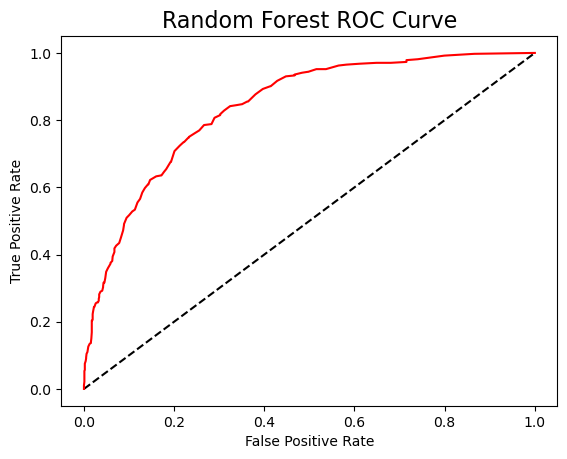

In [80]:
# Predict probabilities
y_probs = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_probs)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [81]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
logisticRegr = LogisticRegression(max_iter=500)
logisticRegr.fit(X_train_scaled, y_train)

# Model evaluation
accuracy = logisticRegr.score(X_test_scaled, y_test)
y_pred_log = logisticRegr.predict(X_test_scaled)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 81.33427963094393%


In [82]:
# Create a regression table

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the regression table
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.412298
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7024
Method:                           MLE   Df Model:                           18
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                  0.2874
Time:                        00:55:26   Log-Likelihood:                -2903.8
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender               -0.0481      0.064     -0.755      0.450      -0.173       0.077
Senior C

In [83]:
# Evaluate classification model for Logistical Regression Model

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_log)
confusion_matrix

array([[938,  98],
       [165, 208]])

Text(0.5, 427.9555555555555, 'Predicted label')

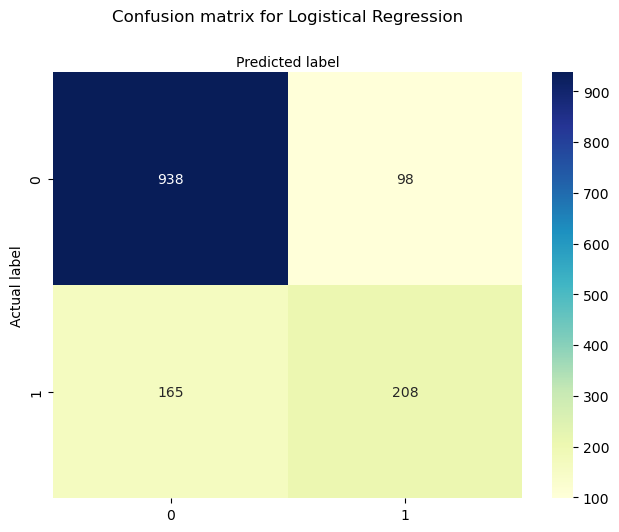

In [84]:
# Create confusion matrix heat map for Logistic Regression
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistical Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [85]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred_log, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.85      0.91      0.88      1036
       Churn       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409

